In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
import math 

In [2]:
# Load the data into a dataframe

# Mode = ["Aligned", "Aligned"]
# Mode = ["Rotated", "Rot30"]
Mode = ["Shifted","Shifted"]

data = pd.read_csv(f"../Files/{Mode[0]}/EventInfo_merge_{Mode[1]}.csv", delimiter = ",", names = ["event", "x", "y", "z", "t"])

# Cut the first bin
data = data[data['t'] > 200]
display(data)

# Load the data into a dataframe
if (Mode[1] != "Rot30"):
    meta = pd.read_csv(f"../Files/{Mode[0]}/Metadata_merge_{Mode[1]}.csv", delimiter = ",", names = ["event","electrons","ions","elastic","ionisations","attachment","inelastic","excitation","top","bottom","start x","start y","start z", "start E", "end E"])

else:
    meta = pd.read_csv(f"../Files/{Mode[0]}/Metadata_merge_{Mode[1]}.csv", delimiter = ",", names = ["event","electrons","ions","elastic","ionisations","attachment","inelastic","excitation","top","bottom","start x","start y","start z"])
 
display(meta)


,event,x,y,z,t
0,21,0.410,0.202,0.501,1037.21
1,21,0.411,0.202,0.492,1081.71
2,21,0.410,0.197,0.486,1113.83
3,21,0.409,0.200,0.482,1135.03
4,21,0.407,0.201,0.480,1147.53
...,...,...,...,...,...
48868924,20000,-0.138,-0.245,-0.486,4414.95
48868925,20000,-0.137,-0.245,-0.486,4415.18
48868926,20000,-0.137,-0.245,-0.486,4415.82
48868927,20000,-0.137,-0.244,-0.486,4416.00


,event,electrons,ions,elastic,ionisations,attachment,inelastic,excitation,top,bottom,start x,start y,start z,start E,end E
0,21,1,0,320837067,0,0,0,1217,0,1,0.410589,0.157936,0.65,1.000000,8.704506
1,22,1,0,322767214,0,0,0,1216,0,1,-0.157715,0.224725,0.65,8.758289,5.126723
2,23,1,0,313063689,0,0,0,1249,0,1,0.284188,0.305848,0.65,2.977845,5.404242
3,24,1,0,315623104,0,0,0,1247,0,1,0.367905,-0.029396,0.65,3.615195,3.890669
4,25,1,0,332230440,0,0,0,1178,0,1,0.357818,-0.239819,0.65,7.103473,6.549282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39975,19996,1,0,327507608,0,0,0,1201,0,1,0.109435,-0.416635,0.65,4.622890,5.882638
39976,19997,1,0,317691154,0,0,0,1236,0,1,0.189803,-0.228414,0.65,2.977126,3.584209
39977,19998,1,0,316225590,0,0,0,1237,0,1,-0.196005,0.274152,0.65,4.442350,5.602722
39978,19999,1,0,338444903,0,0,0,1162,0,1,-0.077307,-0.351011,0.65,4.101224,3.978058


In [ ]:
# Print some additional info
print("ions: ", meta['ions'].sum())
print("Ionisations: ", meta['ionisations'].sum())
print("attachment: ", meta['attachment'].sum())
print("inelastic: ", meta['inelastic'].sum())
print("top: ", meta['top'].sum())
print("bottom: ", meta['bottom'].sum())
print("Mean VuV: ", meta['excitation'].mean())
print("STD/Mean VuV: ", 100*meta['excitation'].std()/meta['excitation'].mean())


In [ ]:
# Bin the scatters in time
tmin=0
tmax=6000
tbw=200

tot_tracks = (len(data['event'].unique()))

tbins = np.arange(tmin, tmax+tbw, tbw)
tbins_centre = np.arange(tmin+tbw/2, tmax+tbw/2, tbw)


data['t'] = pd.cut(x=data['t'], bins=tbins,labels=tbins_centre, include_lowest=True)
display(data)

# Now average over the events
avg = data.groupby(['t']).count()
avg = avg.fillna(0)
avg.reset_index(inplace=True) 
display(avg)

std = data.groupby(['t']).std()
std = std.fillna(0)
std.reset_index(inplace=True) 
display(std)


In [ ]:
# Make a plot of the timing profile of the EL emission
plt.figure()

# New dataframe for storing binned hist details
data_binned = pd.DataFrame()

count = 0

for i in data['event'].unique():
    if (count > 1000): break

    # Plot the data
    counts, bins, bars  = plt.hist(data[data["event"] == i]['t'], bins = np.arange(tmin, tmax+tbw, tbw), histtype="step", color = "green")
    # counts, edges  = np.histogram(data[data["event"] == i]['t'], bins = np.arange(tmin, tmax+tbw, tbw))
    
    # Save binned info to a histogram
    temp_df =  pd.DataFrame({'event': np.ones(len(counts))*i,
                   'Yield': counts,
                   'Time': tbins_centre })
    
    data_binned = pd.concat([data_binned,temp_df])
    count+=1

plt.hist(avg['t'], weights = avg['event']/tot_tracks,bins = np.arange(tmin, tmax+tbw, tbw), histtype="step", color = "black", linewidth=3, label="Mean")
plt.xlim(-200, 6200)

plt.xlabel("Time [ns]")
plt.ylabel("EL Yield")
plt.title(Mode[1])
plt.legend()
plt.savefig("../Plots/"+Mode[1]+"/Yield_vs_Time.pdf")
# plt.title(f"Total VUV:{nVuV}")

plt.figure()
plt.scatter(avg['t'], 100*std['event']/avg['event'])
plt.xlabel("Time [ns]")
plt.ylabel("STD/Mean [%]")
plt.title(Mode[1])
plt.xlim(-200, 6200)
plt.ylim(0, 6 )
plt.savefig("../Plots/"+Mode[1]+"/Fluctuations_vs_Time.pdf")


In [ ]:
# Make a plot of the summed EL Yield over time
summed = data[['event', 't']]
summed = summed.drop_duplicates().groupby('t').count()
summed.reset_index(inplace=True) 
plt.figure()
plt.hist(summed['t'], weights = summed['event'],bins = np.arange(tmin, tmax+tbw, tbw), histtype="step", color = "black", linewidth=3)
# display(test)

In [ ]:
display(data_binned[data_binned['Yield'] > 160])
evt_highY = data_binned[data_binned['Yield'] > 120]['event'].unique()

fig = plt.figure()
ax = fig.add_subplot()

for i in evt_highY:
    ax.plot(data[data["event"] == i]['y'], data[data["event"] == i]['z'])



In [ ]:
# Make a plot of the timing profile of the EL emission
fig = plt.figure()
ax = fig.add_subplot()

count = 0
for i in data['event'].unique():
    if (count > 100): break
    ax.plot(data[data["event"] == i]['y'], data[data["event"] == i]['z'])
    count+=1

# ax.set_zlim(-0.8, 0.7)
# ax.set_xlim(-0.7, 0.7)
# ax.set_ylim(-0.7, 0.7)
# ax.invert_xaxis()

ax.set_xlabel("y [cm]")
ax.set_ylabel("z [cm]")
# ax.set_zlabel("z [cm]")


In [3]:
req_par = ['excitation', 'start x', 'start y']
meta_slim = meta[req_par]
pd.options.mode.chained_assignment = None  # default='warn'

# Flip the y axis
# meta_slim["start y"] = -meta_slim["start y"]

# Convert to mm before writing to file
meta_slim["start x"] = meta_slim["start x"].astype(float)*10
meta_slim["start y"] = meta_slim["start y"].astype(float)*10

hexsize = (1.25+0.127/2.0)/(np.cos(30*np.pi/180))
print(hexsize)

# Calculate the nearest hexagon centre to the point
def hex_round(q,r,s,mode):
    qi = int(round(q))
    ri = int(round(r))
    si = int(round(s))
    q_diff = abs(qi - q)
    r_diff = abs(ri - r)
    s_diff = abs(si - s)
    
    if q_diff > r_diff and q_diff > s_diff:
        qi = -ri - si
    else:
        if r_diff > s_diff:
            ri = -qi - si
        else:
            si = -qi - ri
    
    if (mode == "q"):
        return qi
    elif (mode == "r"):
        return ri
    else:
        return si

# Calculate q and r values for meta_slim table
meta_slim["q"] = (meta_slim["start x"] * np.sqrt(3)/3.0 - 1.0/3.0*meta_slim["start y"]) / hexsize 
meta_slim["r"] = (2.0/3.0)*meta_slim["start y"] / hexsize
meta_slim["s"] = -meta_slim["q"] - meta_slim["r"]

# Calculate the multiple of q and r of the hexagon
meta_slim["nq"] = meta_slim.apply(lambda df: hex_round(df["q"], df["r"], df["s"], "q"), axis = "columns", result_type='expand' )
meta_slim["nr"] = meta_slim.apply(lambda df: hex_round(df["q"], df["r"], df["s"], "r"), axis = "columns", result_type='expand' )

# Shift the values to unit cell
meta_slim["q"] = meta_slim["q"] - meta_slim["nq"]
meta_slim["r"] = meta_slim["r"] - meta_slim["nr"]

# Drop columns that are now not needed
meta_slim = meta_slim.drop(columns = ["s", "nq","nr", "start x", "start y"])

# Define bins in q and r space
numbins = 50

bins_q, bw_q  = np.linspace(-1, +1, numbins, retstep=True)
bins_centre_q = np.linspace(-1+bw_q/2, 1+bw_q/2, numbins)[:-1]

bins_r, bw_r  = np.linspace(-1, +1, numbins, retstep=True)
bins_centre_r = np.linspace(-1+bw_r/2, 1+bw_r/2, numbins)[:-1]

# Now bin the data
meta_slim['q'] = pd.cut(x=meta_slim['q'], bins=bins_q,labels=bins_centre_q, include_lowest=True)
meta_slim['r'] = pd.cut(x=meta_slim['r'], bins=bins_r,labels=bins_centre_r, include_lowest=True)

# Now average over the events
meta_avg_ = meta_slim.groupby(['q', 'r']).mean()
meta_avg_ = meta_avg_.fillna(0)
meta_avg_.reset_index(inplace=True) 

# Kill all the rows that are empty
meta_avg = meta_avg_[meta_avg_['excitation'] != 0]

print(meta_slim['excitation'].mean())
avg_VuV = meta_slim['excitation'].mean()


# Convert q and r back to x and y values (now should be in unit cell)
meta_avg["x"] = hexsize * (np.sqrt(3)*meta_avg["q"].astype(float) + 0.5*np.sqrt(3)*meta_avg["r"].astype(float))
meta_avg["y"] = hexsize * 1.5*meta_avg["r"].astype(float)


# Write the map to a file
meta_avg.to_hdf(f"../Maps/unitcell_{Mode[1]}.h5","Yields", mode='w', format = "table")

display(meta_avg)

1.5166991571611466
1222.334392196098


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/tables/file.py:426: UserWarning: a closed node found in the registry: ``/Yields/meta/values_block_1/meta/_i_table``
  warnings.warn("a closed node found in the registry: "


,q,r,excitation,x,y
423,-0.653061,0.285714,1222.521739,-1.340306,0.650014
424,-0.653061,0.326531,1232.036364,-1.286694,0.742873
425,-0.653061,0.367347,1231.000000,-1.233082,0.835732
470,-0.612245,0.204082,1223.250000,-1.340306,0.464296
471,-0.612245,0.244898,1226.075000,-1.286694,0.557155
...,...,...,...,...,...
1929,0.612245,-0.244898,1223.241379,1.286694,-0.557155
1930,0.612245,-0.204082,1219.888889,1.340306,-0.464296
1975,0.653061,-0.367347,1205.100000,1.233082,-0.835732
1976,0.653061,-0.326531,1219.625000,1.286694,-0.742873


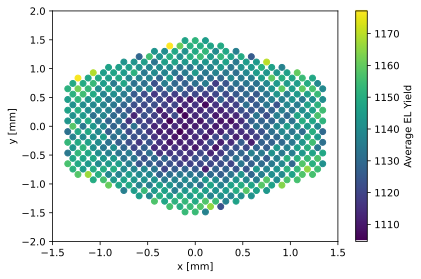

In [184]:
plt.figure()

# plt.scatter(meta_slim["start x"], meta_slim["start y"], c=meta_slim["excitation"])
sc = plt.scatter(meta_avg["x"], meta_avg["y"], c=meta_avg["excitation"])
plt.colorbar(sc, label='Average EL Yield')
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
plt.xlim(-1.5, 1.5)
plt.ylim(-2., 2.)
plt.tight_layout() 
plt.savefig("../Plots/"+Mode[1]+"/Yield_vs_XYpos.pdf")
plt.show()

In [137]:
# Get the start x and start y positions of events which are greater than 
# or less than some percentage of the mean
meta_avg['pct'] = 100*(meta_avg["excitation"] - avg_VuV)/avg_VuV
start_gt = meta_avg[meta_avg['pct'] > 1.5]
start_lt = meta_avg[meta_avg['pct'] < -1.5]


In [ ]:
# Make a side by side plot of the binned energy and the radial cut

plt.figure()

# Plot the total EL yield for each configuration

# Apply a radial cut
range_ = np.arange(0.05, 0.25, 0.05)
for c in range_:
    print("Calculating value: ", c)
    cutval = c
    rad_cut = data[ np.sqrt(data['x']*data['x'] + data['y']*data['y']) >= cutval]['event'].unique()
    filtered_data = data[~data.event.isin(rad_cut)]

    data_align_tot = filtered_data.pivot_table(columns=['event'], aggfunc='size').reset_index()
    data_align_tot.columns = ['event', 'Yield']
    plt.hist(data_align_tot['Yield'], bins = np.arange(1000, 1400, 10), histtype="step",density = True, linewidth=2, label='{0:.2f}'.format(c) )

plt.xlabel("EL Yield")
plt.ylabel("Counts")
plt.legend(loc = 'upper right')
plt.savefig("../Plots/"+Mode[1]+"/YieldTotal.pdf")

In [ ]:
# Merge dataframe to get start position in the data table
data_meta = data.merge( , on="event", how = 'inner')

# Now bin the data
data_meta['start x'] = pd.cut(x=data_meta['start x'], bins=bins,labels=bins_centre, include_lowest=True)
data_meta['start y'] = pd.cut(x=data_meta['start y'], bins=bins,labels=bins_centre, include_lowest=True)

data_meta = data_meta.drop(columns=["excitation", "electrons", "ions", "elastic", "ionisations", "attachment", "inelastic","top", "bottom", "start z", "start E", "end E"])


# Get all events with energy resolution greater/less than mean by some percentage
data_meta_gt = pd.merge(start_gt.reset_index(), data_meta, how='inner').set_index('index')
data_meta_lt = pd.merge(start_lt.reset_index(), data_meta, how='inner').set_index('index')


# Average over the time bins to get the average waveform in each mode
avg_gt = data_meta_gt.groupby(['t']).count()
avg_gt = avg_gt.fillna(0)
avg_gt.reset_index(inplace=True) 

avg_lt = data_meta_lt.groupby(['t']).count()
avg_lt = avg_lt.fillna(0)
avg_lt.reset_index(inplace=True) 


display(data_meta_gt)



In [ ]:
# Make a plot of the start x and start y which have a yield greater and less than the average
plt.figure()

start_gt = data_meta_gt.drop(columns = ["excitation", "pct", "event", "x", "y", "z","t"])
start_gt = start_gt.drop_duplicates()

plt.scatter(start_gt["start x"], start_gt["start y"])

plt.figure()

start_lt = data_meta_lt.drop(columns = ["excitation", "pct", "event", "x", "y", "z","t"])
start_lt = start_lt.drop_duplicates()

plt.scatter(start_lt["start x"], start_lt["start y"])

In [ ]:
plt.figure()
plt.hist(avg_gt['t'], weights = avg_gt['event'],bins = np.arange(tmin, tmax+tbw, tbw), histtype="step", color = "black", linewidth=3, label="Mean", density = True)
avg_lt['t_'] = avg_lt['t'].astype('float')
avg_lt['t_'] = avg_lt['t_']+200
plt.hist(avg_lt['t_'], weights = avg_lt['event'],bins = np.arange(tmin, tmax+tbw, tbw), histtype="step", color = "blue", linewidth=3, label="Mean", density = True)
plt.xlim(-200, 6200)

plt.xlabel("Time [ns]")
plt.ylabel("EL Yield")
